# Python in control theory

Python is also a very useful tool in many control applications. SciPy is a collection of mathematical algorithms and convenience functions built on the Numpy extension of Python. Scipy is also a python package of algorithms and mathematical tools for technical computing. It contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT (Fast Fourier Transform), signal and image processing, ODE solvers and other tasks common in science and engineering. With SciPy it is possible to solve some control problems and make simulations like in Matlab. SciPy has wide collection of built-in functions that can be used to solve numerical problems. Here are some examples how control problems can ne solved using Python and SciPy. 

Python Control Systems Library includes python-control package as a set of Python classes and functions that implement common operations for the analysis and design of feedback control systems. It also has a MATLAB compatibility package (control.matlab) that provides many of the common functions corresponding to commands available in the MATLAB Control Systems Toolbox.

## Basic SciPy functions

### Linspace

Linspace is easy way to create vectors. It returns evenly spaced numbers over a specified interval. 

In [1]:
from scipy import linspace
linspace(0.2, 99, 10)

array([  0.2       ,  11.17777778,  22.15555556,  33.13333333,
        44.11111111,  55.08888889,  66.06666667,  77.04444444,
        88.02222222,  99.        ])

### Odeint

Odeint is function that can be used to integrate a system of ordinary differential equations. Basic parametres are odeint(func, y0, t). Func is the function where the derivative of $y=sin(x)^{y}$ at $t_0$ is computed, $y_0$ is initial condition on $y$ and $t$ is a sequence of time points for which to solve for $y$ where the initial value point should be the first element of this sequence. Here is an example of simple first degree system.

We have a first degree transfer function where time constant $\tau$ is 2. Then we will simulate step response of that system. Problem presented in Simulink:

<center> <img src="http://i.imgur.com/TBOqHJH.png" width=50%> </center>  

Same problem solved with Python:

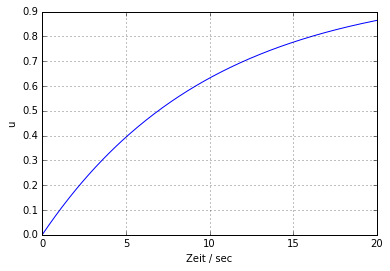

In [2]:
from scipy.integrate import odeint
from matplotlib.pyplot import figure, plot, grid, show, subplot, xlabel, ylabel
# to show graphs inline in some IPython Notebooks 
%matplotlib inline
# parameters of simulation
t = linspace(0,20,201) # simulation time 20 s
u = 1

# system presented as an function
def plant(y,t):
    tau = 10
    dydt = (1.0/tau)*(u-y)
    return dydt
    
# simulation using odeint    
y = odeint(plant,0,t)

#plotting
figure()
subplot(111)
plot(t,y,'b')
xlabel('Zeit / sec'), ylabel('u')
grid()
show()

### Freguency response of transfer function

Scipy can be used to plot the frequency response in python. First the numerator an denominator of the transfer function must be defined. In this case num is $1$ and in python it is written as [0,1]. The den is $2s + 1$ and in python its written as [2,1]. The gain of the response must also be defined. The frequency response can also be defined by using the zeros and poles of the transfer function. Then the command s1=signal.lti(zeros,poles,gain) vould be used.

In [3]:
%matplotlib inline

from scipy import *
from scipy import signal
from numpy import *
from scipy.integrate import *
from matplotlib.pyplot import *
from time import sleep
from IPython.display import display, clear_output
#transfer funktion H(s)=(1/2s+1)
for x in linspace(5,10,100):
    fig = figure()
    ax = fig.gca()
    num=[1]
    den=[x,10,20]
    s1=signal.lti(num,den,1)    w,H=signal.freqresp(s1)
    ioff()
    ax.grid()
    ax.plot(H.real, H.imag, "r")
    ax.plot(H.real, -H.imag, "b") 
    ax.set_xlim([-0.0005, 0.01],auto=False)
    ax.set_ylim([-0.01, 0.01],auto=False)
    ion()
    show()
    sleep(0.1)
    clear_output(wait=True)

SyntaxError: invalid syntax (<ipython-input-3-c2ff6d3b8138>, line 16)

In [ ]:
show?   
    

In [ ]:
g = a.add_axes

## Python control library

The python-control package is a set of python classes and functions that implement common operations for the analysis and design of feedback control systems. A MATLAB compatibility package (control.matlab) is available that provides many of the common functions corresponding to commands available in the MATLAB Control Systems Toolbox. Here are some examples how we can use use the package when designing control systems.

### Methods of making LTI system

There are two basic forms how system can be presented if we want to use control library. We can use create state-space (SS) or transfer function (TF) model. Both are quite simple to create. Here is the state-space model we will want to create: 

<center>$\small
\begin{matrix} 
\left \{\begin{matrix}
\dot{\textbf{x}}&=\textbf{Ax}+\textbf{Bu} & 
\\
y&=\textbf{Cx}
\end{matrix}  \right.
&
\textbf{A}=\begin{bmatrix}
 -1&1 \\ 
 -1&0 
\end{bmatrix},
\textbf{B}=\begin{bmatrix} 1\\0\end{bmatrix},
\textbf{C}=\begin{bmatrix} 1&0\end{bmatrix},
\textbf{x}=\begin{bmatrix}x_1 \\x_2 \end{bmatrix}
\end{matrix}  $ </center>

In [ ]:
from control import *
# matrices
A = [[-1,1], [-1,0]]
B = [[1], [0]]
C = [1, 0]
D = [0]

# creating the system
ss1 = ss(A, B, C, D)

Transfer function:

 <center> $G(s)=\frac{Y(s)}{U(s)}=\large\frac{s+1}{s^2 +10s+5}$ </center> 

In [ ]:
# numerator
num = [1, 1]
# denominator
den = [1, 2, 5]

# creating the system
tf1 = tf(num, den)


We can also transform a state space system to a transfer function or vice versa

In [ ]:
# state space to transfer function
tf2 = ss2tf(ss1)

# transfer function to state space
ss2 = tf2ss(tf1)

### Feedback loop and block diagram algebra

Different systems can be easily combined by python-control package. Here $G(s)$ is the system and $H(s)$ controller. If those systems are known, total transfer function $G_T(s)$ can be formed easily:

<center> <img src="http://i.imgur.com/lXMazdv.png" width=30%> </center>  

In [ ]:
# primary plant
G = tf1
# feedback plant 
H = tf2
# total plant
GT = feedback(G, H, sign=-1) # sign is -1 if feedback is negative

Negative of the system and systems in series or parallel

In [ ]:
# negative
Gneg = negate(G)

# systems in seris
GHser = series(G, H)

# systems in parallel
GHpar = parallel(G, H)

### System analysis

There are several function in control library that can be used to analyze properties of the system.

In [ ]:
# Compute the gain of the system in steady state. 
dcgain(G)

In [ ]:
from numpy import pi
# Evaluate the transfer function of an LTI system at an angular frequency.
omega = pi # angular frequency
evalfr(G, omega)

In [ ]:
# Compute system poles.
pole(G)

In [ ]:
# Compute system zeros.
zero(G)   

### Frequency Domain Plotting

It is also easy to plot frequency domain, such as Bode plot or Nyquist plot.

In [ ]:
# Bode plot
# parameters
linsys = G   # List of linear input/output systems (single system is OK)
omega = None # Range of frequencies (list or bounds) in rad/sec
dB = False   # If True, plot result in dB
Hz = True    # If True, plot frequency in Hz (omega must be provided in rad/sec)
deg = True   # If True, return phase in degrees (else radians)
Plot = True  # If True, plot magnitude and phase

bode_plot(linsys, omega, dB, Hz, deg, Plot)
'''
Returns:
mag : array (list if len(syslist) > 1)
    magnitude
phase : array (list if len(syslist) > 1)
    phase
omega : array (list if len(syslist) > 1)
    frequency
'''

In [ ]:
# Nyquist plot
# parametres
labelFreq = 0  # Label every nth frequency on the plot

nyquist_plot(linsys, omega=None, Plot=True, color='b', labelFreq=0)

'''
Returns:	
real : array
    real part of the frequency response array
imag : array
    imaginary part of the frequency response array
freq : array
    frequencies
'''

### Simulation of the systems in time domain

There are several functions that can be used to simulate the output of linear system, such as a step or impulse response. Here is an example of simulating the step response:

In [ ]:
# Step response
# Parametres
sys = G           # LTI system to simulate
T = None          # Time vector (argument is autocomputed if not given)
x0 = 0.0          # Initial condition (default = 0)
input = 0         # Index of the input that will be used in this simulation
output = 0        # Index of the output that will be used in this simulation.
transpose = False # If True, transpose all input and output arrays

# Simulating and plotting the results
T, yout = step_response(sys, T, x0, input, output, transpose)
plot(T, yout)

<hr>
<center> 
 <a href="http://nbviewer.ipython.org/url/aspicc.fs.cvut.cz/PVVR/CourseWare/IPython_Notebook_6.ipynb">prev </a>   <===>
 <a href="http://nbviewer.ipython.org/url/aspicc.fs.cvut.cz/PVVR/CourseWare/IPython_Notebook_8.ipynb"> next </a><br>
 <a href="http://aspicc.wix.com/python-control" style="font-size:90%">  Aspic(c) in Python </a>
</center>


<a href="http://aspicc.fs.cvut.cz/" target="_blank" style="text-decoration:none;"> <img src="http://aspicc.fs.cvut.cz/img/aspicc.png" style="height:45px;"> </a> 